In [2]:
import numpy as np
import rasterio
from matplotlib import pyplot as plt

In [3]:
# Dataset is from: https://lcviewer.vito.be/download
# Download block east of England
dataset_land = rasterio.open(
    "./data/E000N60_PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326.tif")
img_land = dataset_land.read(1)

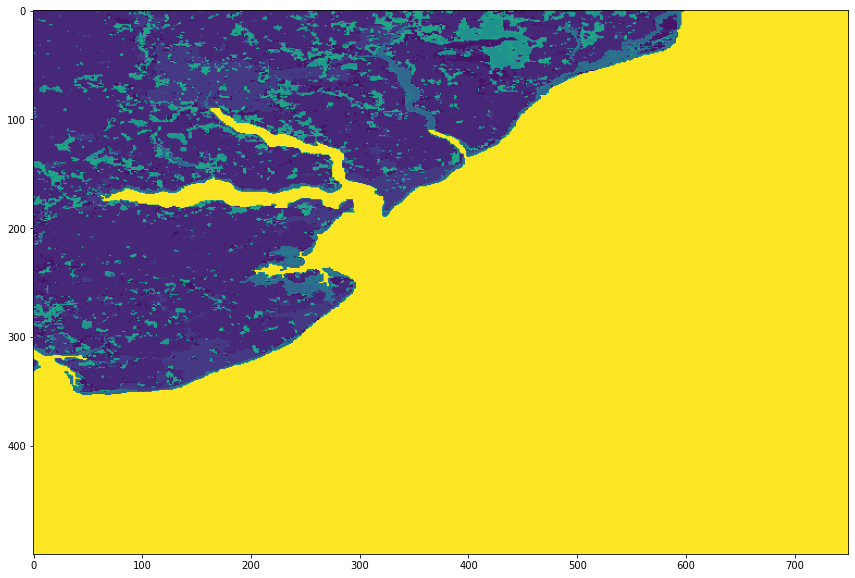

In [4]:
img_h, img_w = (750, 500)
plt.rcParams['figure.figsize'] = [20, 10]

left_top_coord = (0.99941, 52.11874)  # enter coordinate here
left_top_x, left_top_y = dataset_land.index(left_top_coord[0], left_top_coord[1])

img = np.copy(img_land[left_top_x:left_top_x + img_w, left_top_y:left_top_y + img_h])
plt.imshow(img)

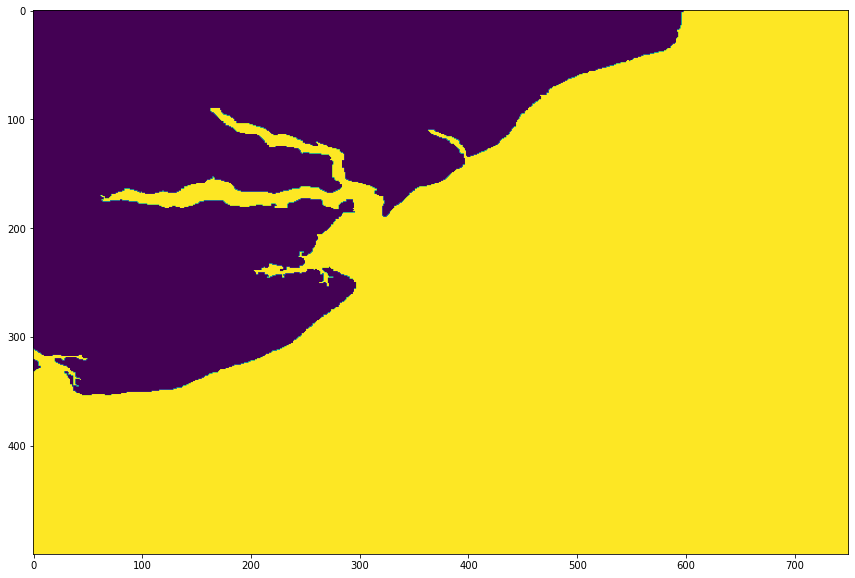

In [5]:
# use as mask
img = np.copy(img_land[left_top_x:left_top_x + img_w, left_top_y:left_top_y + img_h])
img[img != 200] = 0  # 200 is ocean index
img[img == 200] = 1
plt.imshow(img)

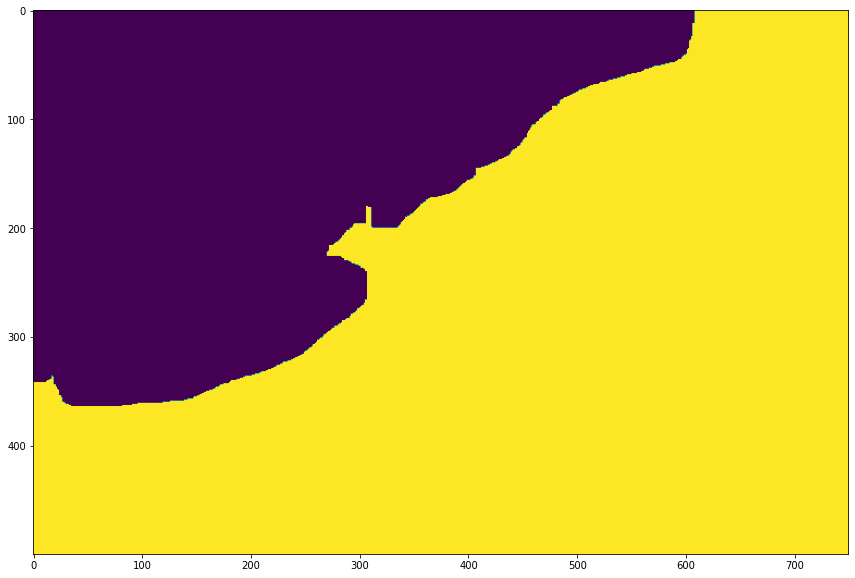

In [6]:
from cv2 import cv2 as cv

# add erosion to exclude beaches
kernel = np.ones((5, 5), np.uint8)
img_erode = cv.erode(img, kernel, iterations=5)
plt.imshow(img_erode)